In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "hive"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 24
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hive,0,1,0.814103,0.913669,0.861017,0.829520,0.692316,0.908333,0.524590,base
1,hive,0,2,0.726667,0.825758,0.773050,0.720978,0.572603,0.822739,0.397059,base
2,hive,0,3,0.760736,0.918519,0.832215,0.840171,0.606141,0.924568,0.400000,base
3,hive,0,4,0.662500,0.905983,0.765343,0.746061,0.562626,0.768890,0.349398,base
4,hive,0,5,0.695364,0.882353,0.777778,0.744527,0.617465,0.784351,0.432099,base


In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hive,15,16,0.726027,0.861789,0.788104,0.751029,0.643511,0.832588,0.480519,ecoselekt
1,hive,15,17,0.722222,0.881356,0.793893,0.808289,0.671883,0.836572,0.512195,ecoselekt
2,hive,15,18,0.692308,0.933962,0.795181,0.848856,0.704832,0.850212,0.531915,ecoselekt
3,hive,15,19,0.664286,0.869159,0.753036,0.789619,0.655673,0.824622,0.494624,ecoselekt
4,hive,15,20,0.566929,0.857143,0.682464,0.815989,0.671371,0.786800,0.525862,ecoselekt


In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hive,15,16,0.726027,0.861789,0.788104,0.751029,0.643511,0.832588,0.480519,best
1,hive,15,17,0.722222,0.881356,0.793893,0.808289,0.671883,0.836572,0.512195,best
2,hive,15,18,0.692308,0.933962,0.795181,0.848856,0.704832,0.850212,0.531915,best
3,hive,15,19,0.664286,0.869159,0.753036,0.789619,0.655673,0.824622,0.494624,best
4,hive,15,20,0.566929,0.857143,0.682464,0.815989,0.671371,0.786800,0.525862,best


(90, 11)


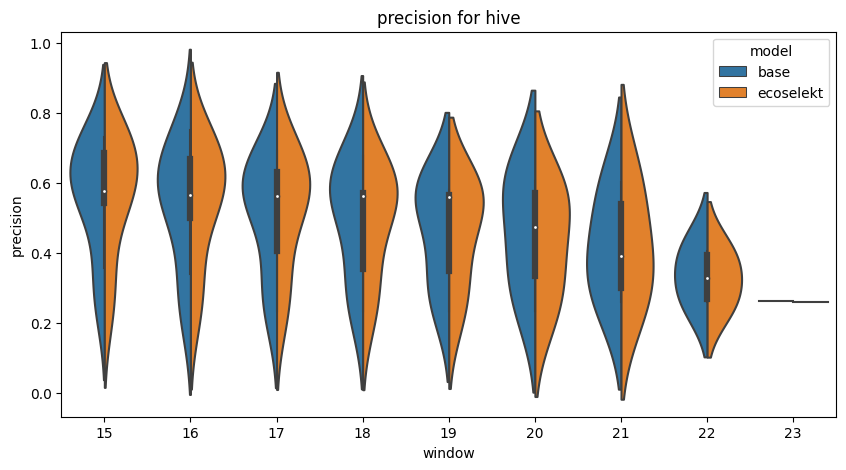

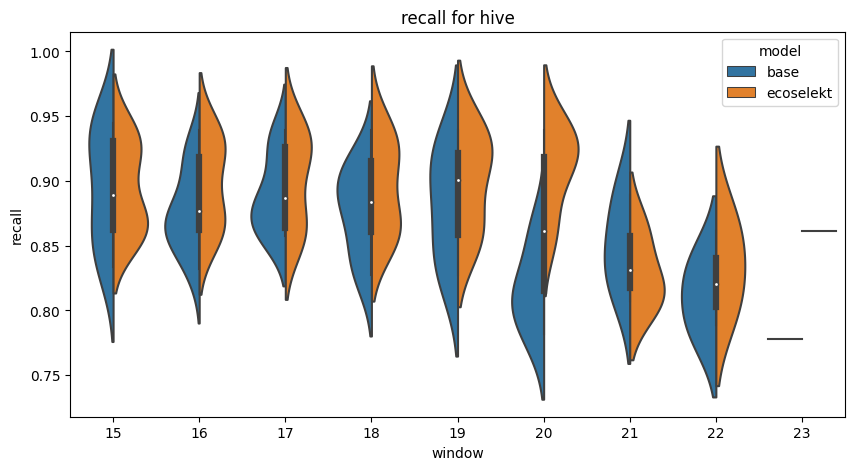

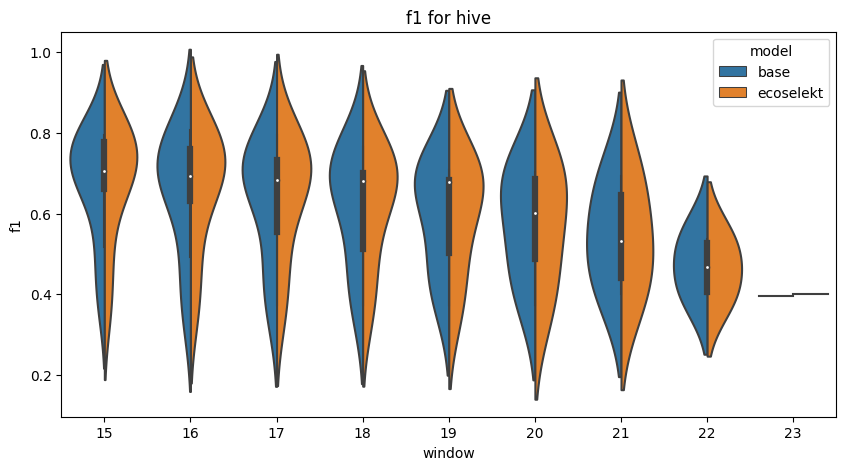

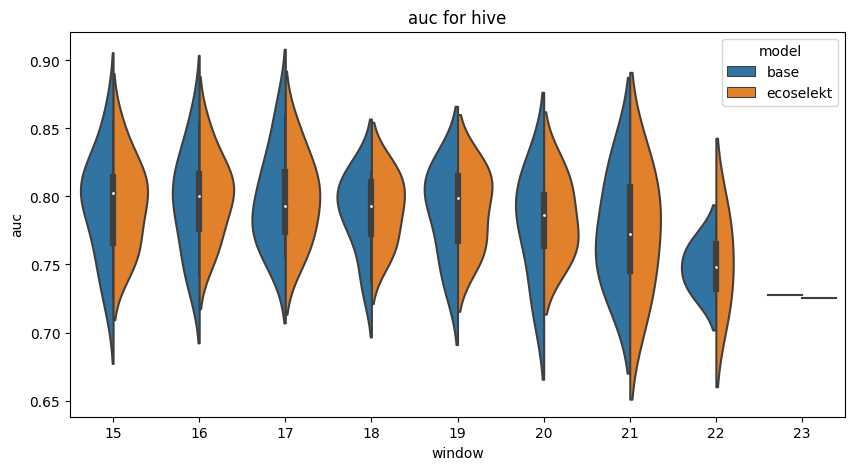

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


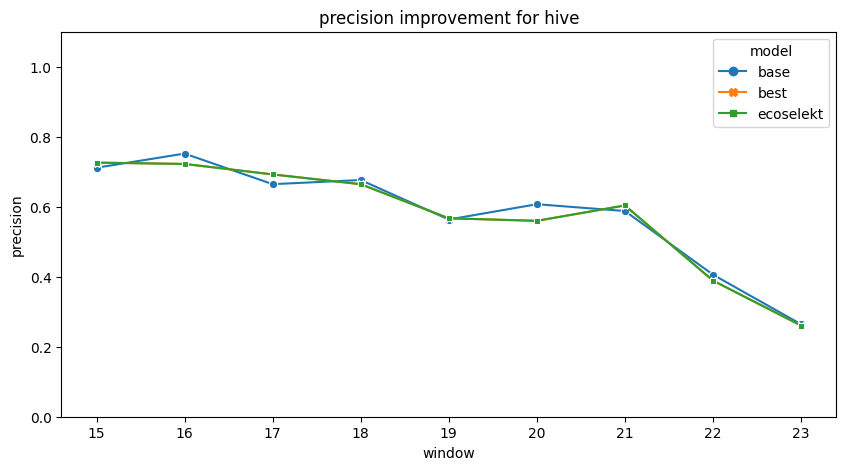

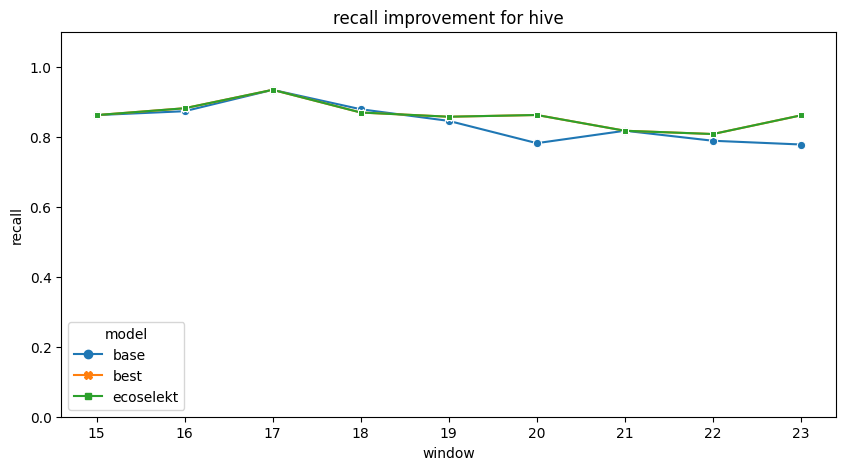

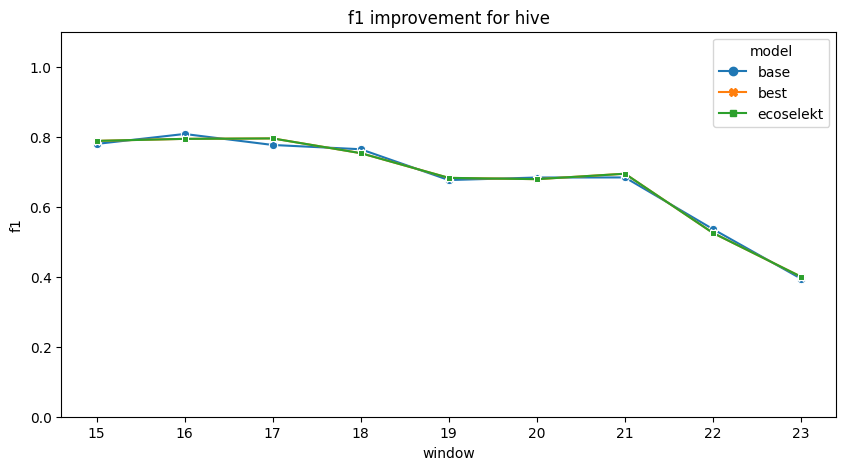

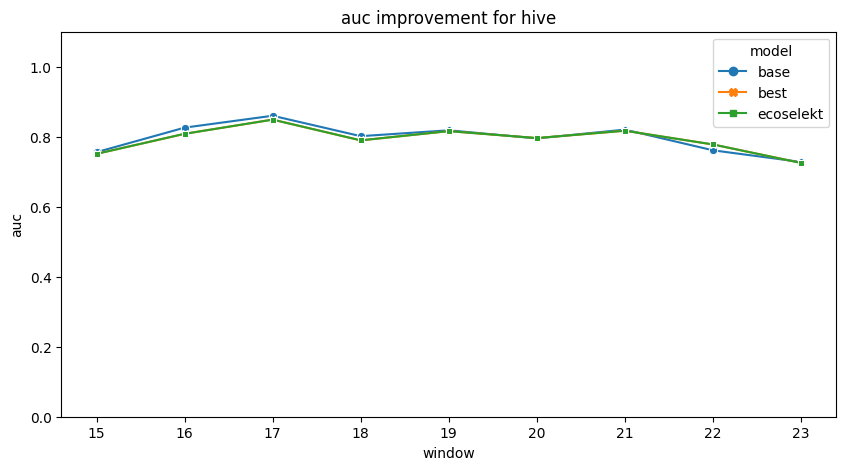

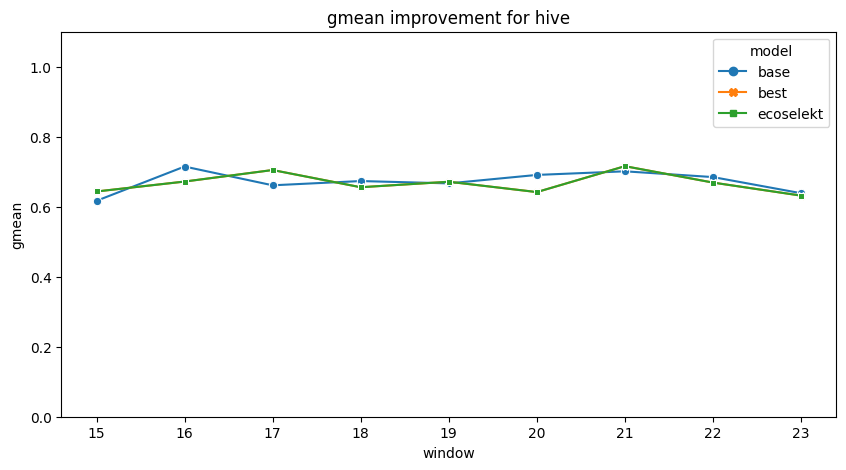

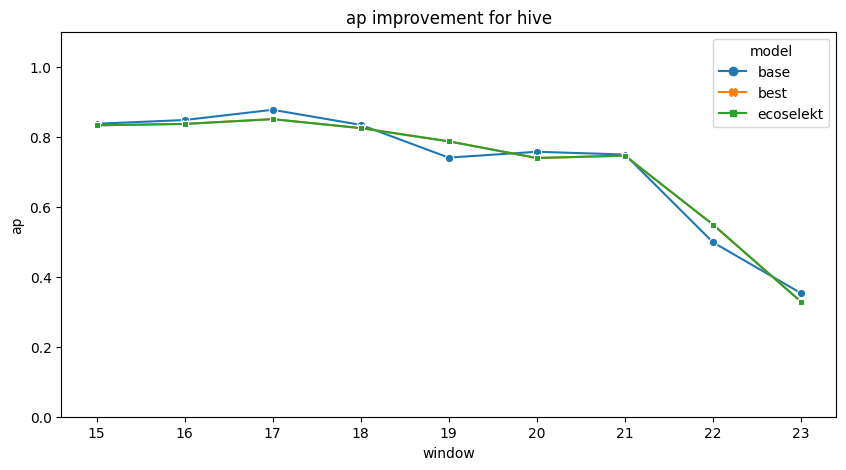

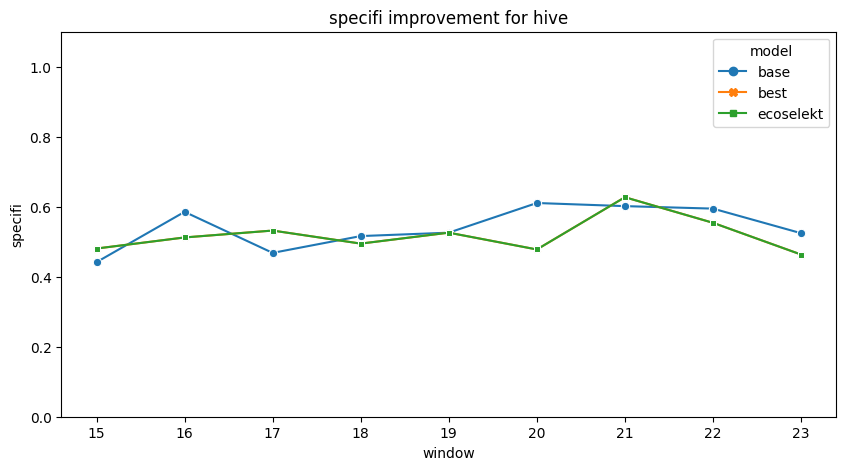

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

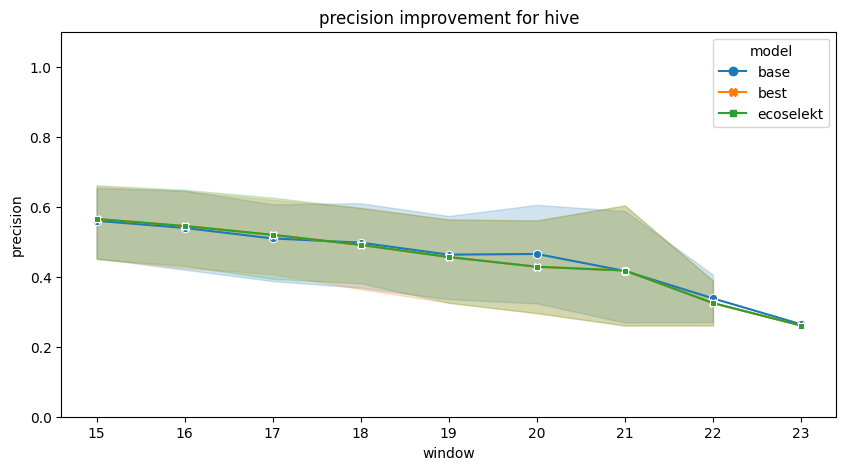

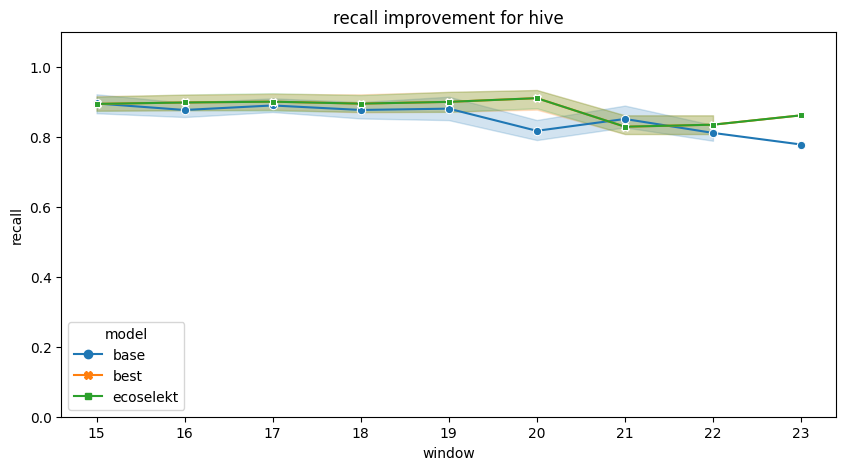

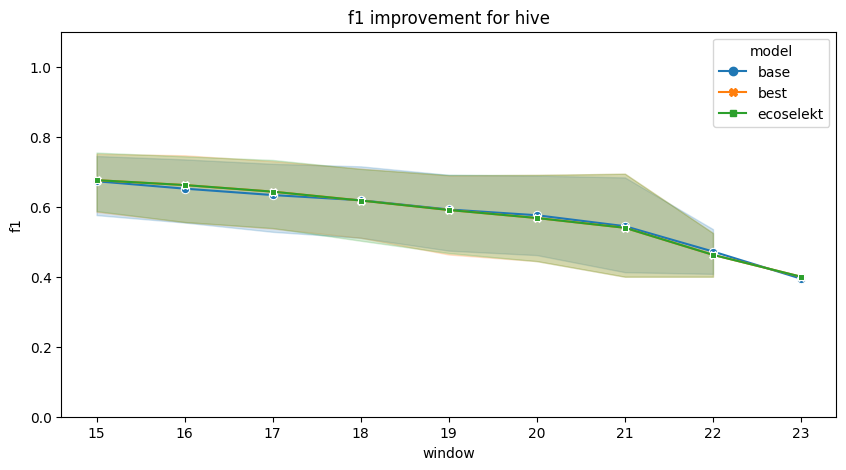

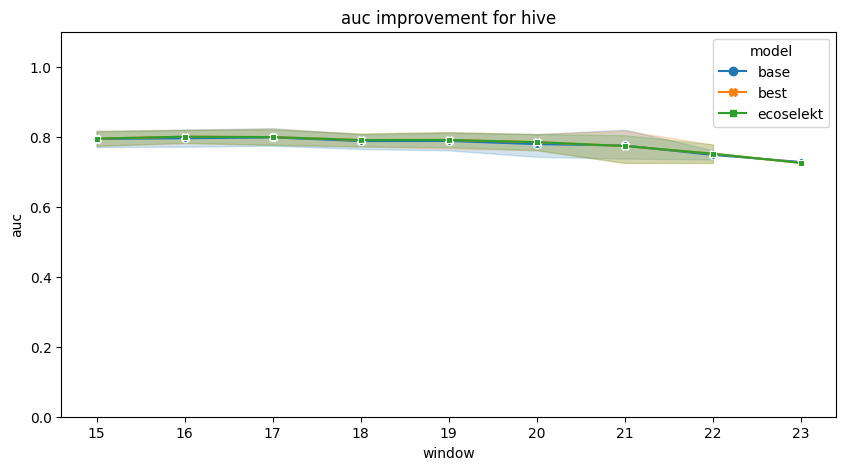

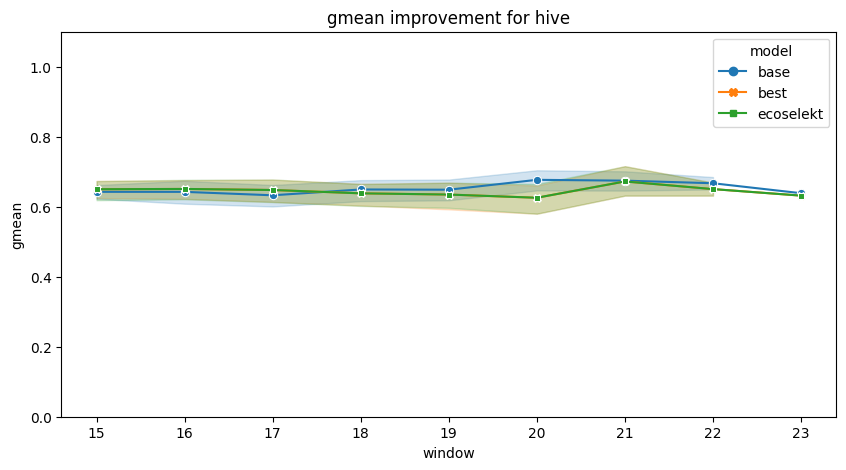

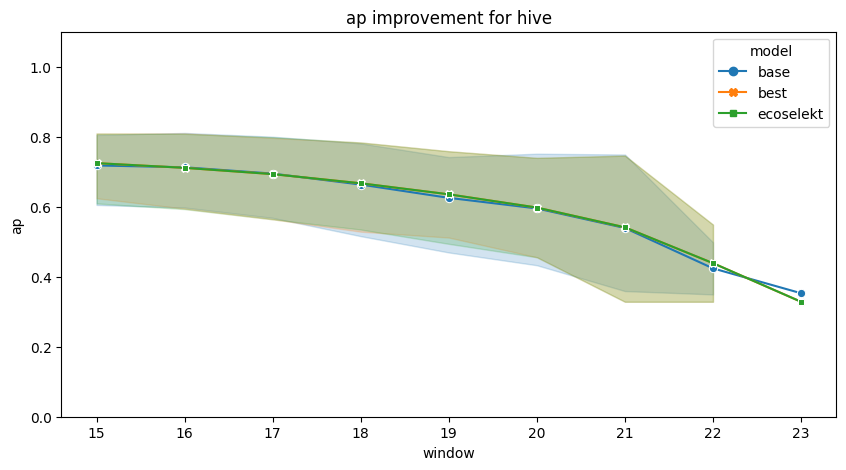

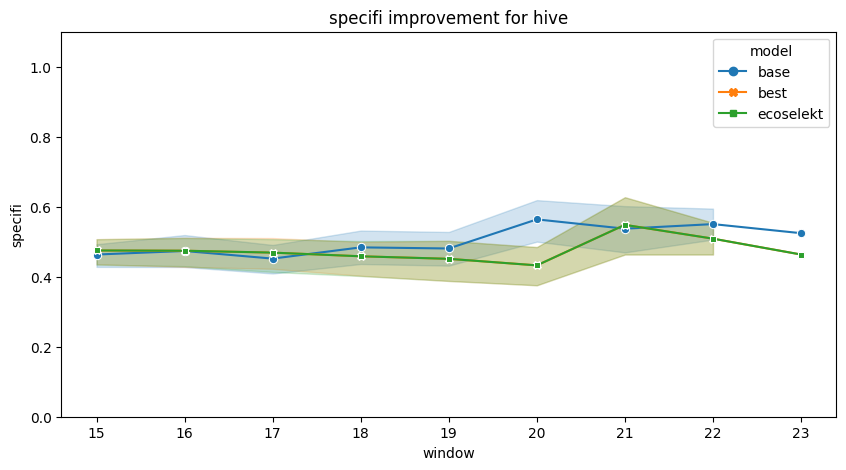

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.12890625
Wilcoxon test significance: False


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.07473549830588248
Wilcoxon test significance: False


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(9000, 4)


,commit_id,window,test_split,model_version
0,e6143de2b0c3f53d32db8a743119e3a8080d4f85,15,16,14
1,1cae318fb09a4b3210c8fb3c233811bd000c829d,15,16,14
2,073e8473ea61da995c42847ea53909e77f7e76f2,15,16,14
3,60795505b5c8ff1162afcb7e93013665b228e150,15,16,14
4,3a2d3177853714b31cadc2bfad2c9a63f4798899,15,16,14


In [12]:
selektmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selected_model_per_test_split.csv")
selektmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(selektmodel_df.shape)
selektmodel_df.head()

(21000, 4)


,commit_id,window,test_split,model_version
0,010157e9ab16601b72431ad68efb763ea11c170c,15,16,15
1,01fd68443d41a95362920c5a526d13e41b7684c8,15,16,9
2,03ee0481a518585a4a92875d88c560ff525d75d4,15,16,15
3,09b00fc863d19cf513fe1d188bb671f370f64c2d,15,16,15
4,0a5bc94c1cf65d66f793474a4818021f29e05c7e,15,16,4


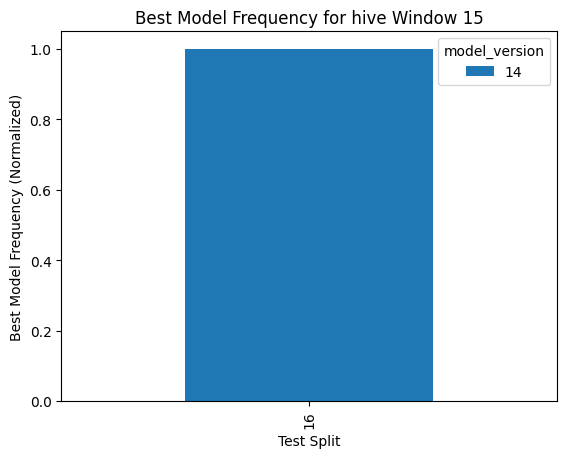

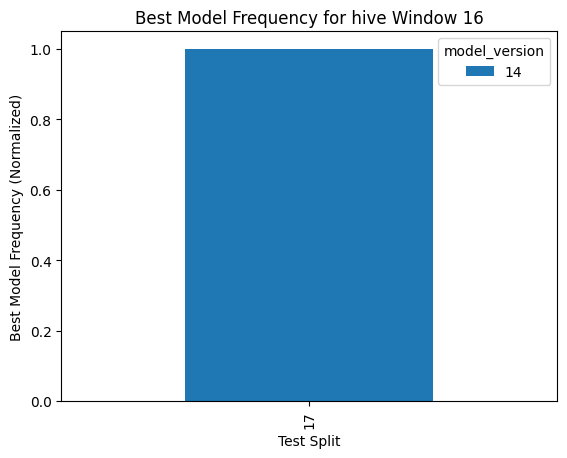

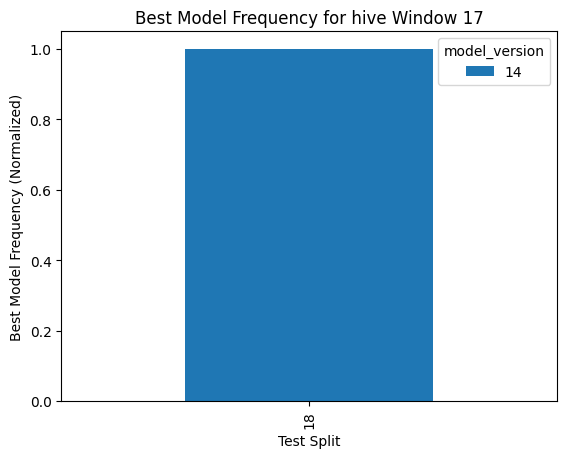

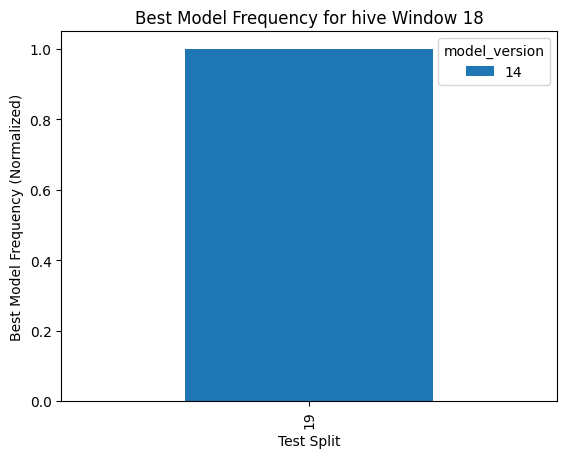

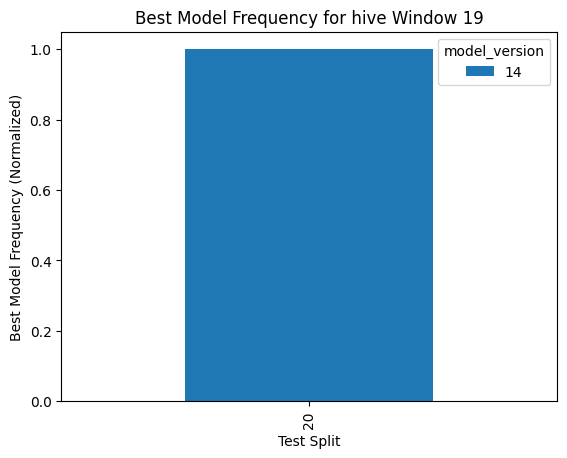

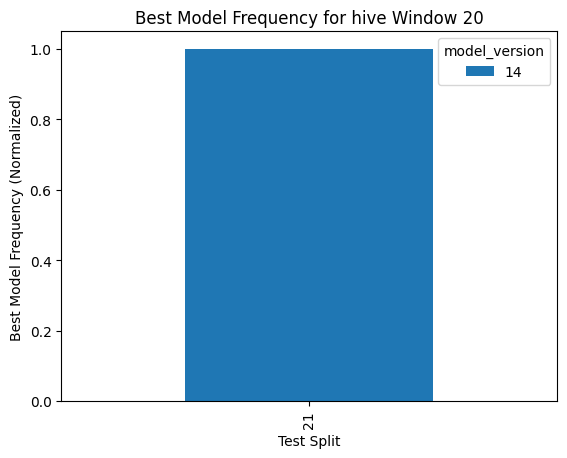

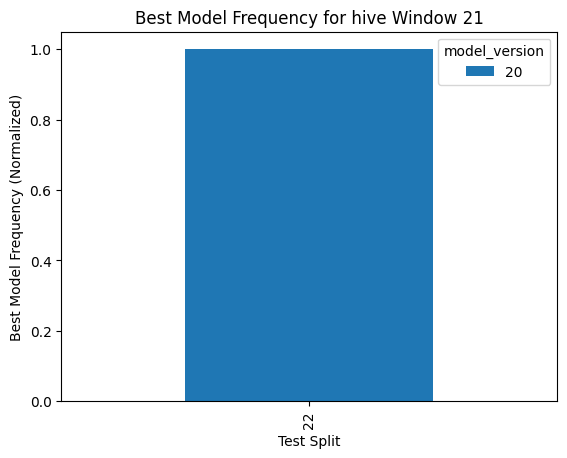

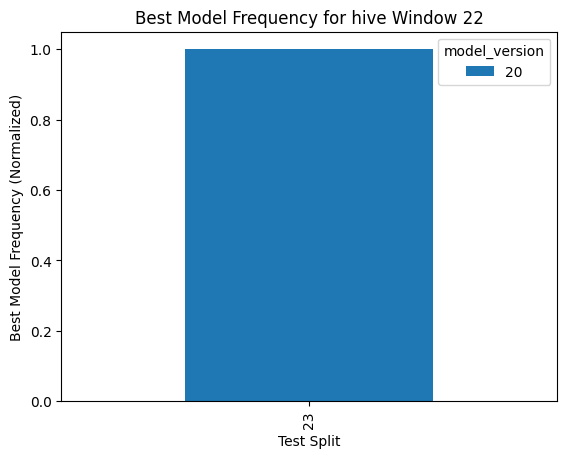

In [13]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")